# Лабораторная работа №3

___
**Цель работы: изучение алгоритмов и методов регрессии на практике.**
___

## 1. Обработка данных файла
___

**Для начала импортируем необходимые библиотеки для выполнения работы**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

**pandas - для анализа данных, seaborn и matplotlib — это библиотека для создания статистических графиков, sklearn - для работы с моделями, numpy - для расчётов**

**Далее считаем данные с файла, содержащего данные**

In [2]:
data = pd.read_excel('regression.xlsx', sheet_name='var1')
data.head()

,x1,x2,y
0,1.929428,1.511727,5.734255
1,-0.330281,-0.898878,-0.623706
2,0.688773,0.908247,1.028884
3,-0.008892,-0.518823,-0.894802
4,-1.698716,0.610347,2.822400


___
## 2. Работа с простой линейной регрессией
___

**В начале введём общие параметры построения графиков для того, чтобы унифицировать дизайн**

In [3]:
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10
# Установка seed для воспроизводимости результатов
np.random.seed(42)


**Устанавливаем белый фон с сеткой, размер шрифта равный 10 и устанавливаем начальное значение для случайных чисел, чтобы каждый раз при перезапуске блоков кода результат был одинаковым**

___
### 2.1 Обучение моделей простой (парной) линейной регрессии
___

**Для обучения моделей требуется непосредственно их создать, прейдём к этому.**

In [4]:
# Модель 1: y = a * x2 + b
model_x1 = LinearRegression()
X1_train = data['x1'].to_frame()
Y_train = data['y']
model_x1.fit(X1_train, Y_train)

# Модель 2: y = a * x2 + b
model_x2 = LinearRegression()
X2_train = data['x2'].to_frame()
model_x2.fit(X2_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


В данном блоке кода происходит инициализация модели. Создает новый пустой объект класса "LinearRegression". Этот объект — контейнер для алгоритма, который будет искать оптимальные коэффициенты a и b. Далее используем метод ".to_frame" для преобразования одномерного столбеца в двумерный "DataFrame". Эта команда просто берет одномерный столбец x и превращает его в двумерную таблицу с одной колонкой. Это обязательно, так как библиотека sklearn требует, чтобы входные данные всегда были двумерными. x должен быть двумерной таблицей, потому что это входные признаки, а y должен быть одномерным вектором, потому что это единичный ответ для каждого признака. Следующим шагом происходит обучение модели - запускается алгоритм наименьших квадратов: модель анализирует данные в x_train и y_train и вычисляет оптимальные значения коэффициентов a (свободный член) и b (наклон), которые минимизируют общую ошибку предсказания. Таблица параметров модели предоставляет доступ к следующей информации:
1) fit_intercept - Определяет, должна ли модель вычислять и использовать свободный член (b). Если True, модель найдет оптимальное смещение a, если False, модель принудительно установит b=0, и линия регрессии пройдет строго через начало координат.
2) copy_X - если True, входные данные X будут скопированы до того, как будут обработаны моделью. Это гарантирует, что исходные данные останутся неизменными, даже если алгоритму потребуется их модифицировать.
3) tol - Определяет минимальное изменение коэффициентов, которое считается значимым. Если изменения в коэффициентах становятся меньше этого допуска, алгоритм считает, что он сошелся (нашел оптимальное решение) и останавливается.
4) n_jobs - Определяет, сколько процессорных ядер можно использовать для вычислений. Если None (по умолчанию), используется 1 ядро.
5) positive - Если True, модель принудительно наложит ограничение, что все коэффициенты наклона b должны быть положительными.

___
### 2.2 Выполнение предсказания
___

**Далее происходило вычисление моделями предсказания при помощи метода predict. Это метод, который принадлежит объекту регрессии, его задача — взять входные данные и применить к ним сохраненное уравнение регрессии. Результатом становятся новые наборы чисел. Каждое из этих чисел является предсказанным значением y, рассчитанным моделью для соответствующего значения x.**

In [5]:
Y_pred_x1 = model_x1.predict(X1_train)
Y_pred_x2 = model_x2.predict(X2_train)

___
### 2.3 Создание и вывод датафрейма с истинными и предсказанными значениями
___

**Следующим шагом стал вывод предсказанных значений и предоставленных в фалйе изначально. По данным в таблице можно заметить, что данные, предсказанные со столбца x1, ближе к правде чем со столбца x2.**

In [6]:
results = pd.DataFrame({
    'Истинное_Y': Y_train,
    'Предсказанное_Y_от_X1': Y_pred_x1.round(6),
    'Предсказанное_Y_от_X2': Y_pred_x2.round(6)
})

display("Датафрейм с истинными и предсказанными значениями (первые 5 строк):")
display(results.head())

'Датафрейм с истинными и предсказанными значениями (первые 5 строк):'

,Истинное_Y,Предсказанное_Y_от_X1,Предсказанное_Y_от_X2
0,5.734255,1.412975,2.549342
1,-0.623706,1.314354,0.602974
2,1.028884,1.358829,2.062081
3,-0.894802,1.328381,0.909838
4,2.822400,1.254632,1.821551


___
### 2.4 Подсчет и вывод метрик качества регрессии (MSE, MAE, RMSE, R2)
___

Далее происходило вычисление метрик качества регрессии для пердсказанных значений. Это самые важные показатели для оценки любой модели регрессии. Они помогают понять, насколько хороши ваши предсказания в сравнении с истинными значениями.
Метрики делятся на две категории:
Метрики ошибки (MSE, MAE, RMSE): Чем меньше их значение, тем лучше.
Метрики соответствия (R2): Чем ближе их значение к 1.0, тем лучше.
1) MSE (Mean Squared Error) — Среднеквадратичная ошибка (квадрат разности)
2) MAE (Mean Absolute Error) — Средняя абсолютная ошибка (модуль разницы)
3) RMSE (Root Mean Squared Error) — Корень из среднеквадратичной ошибки
4) R² (R-squared) — Коэффициент детерминации: доля дисперсии (разброса) зависимой переменной y, которая была объяснена вашей моделью.

Изучив полученные данные можно сказать, что данные x1 намного более точные, чем данные x2.

In [7]:
def calculate_and_print_metrics(Y_true, Y_pred, model_name):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse) 
    r2 = r2_score(Y_true, Y_pred)

    display(f" Метрики качества для {model_name}:")
    display(f"   MSE (Среднеквадратичная ошибка): {mse:.4f}")
    display(f"   MAE (Средняя абсолютная ошибка): {mae:.4f}")
    display(f"   RMSE (Корень из среднеквадратичной ошибки): {rmse:.4f}")
    display(f"   R2 (Коэффициент детерминации): {r2:.4f}")

    return r2

r2_x1 = calculate_and_print_metrics(Y_train, Y_pred_x1, "Модели 1 (y от x1)")
r2_x2 = calculate_and_print_metrics(Y_train, Y_pred_x2, "Модели 2 (y от x2)")


' Метрики качества для Модели 1 (y от x1):'

'   MSE (Среднеквадратичная ошибка): 2.6063'

'   MAE (Средняя абсолютная ошибка): 1.3152'

'   RMSE (Корень из среднеквадратичной ошибки): 1.6144'

'   R2 (Коэффициент детерминации): 0.0010'

' Метрики качества для Модели 2 (y от x2):'

'   MSE (Среднеквадратичная ошибка): 1.7396'

'   MAE (Средняя абсолютная ошибка): 1.0980'

'   RMSE (Корень из среднеквадратичной ошибки): 1.3190'

'   R2 (Коэффициент детерминации): 0.3332'

___
### 2.5 Вывод значений коэффициентов a и b
___

**Следующим шагом стал вывод математических параметров, которые были найдены алгоритмом, и представляют их в виде законченного, понятного уравнения регрессии. Полученное значение a или b — это единый, оптимальный параметр, который описывает связь для всех строк данных.**

In [8]:
# Модель 1 (y от x1)
a1 = model_x1.coef_[0]
b1 = model_x1.intercept_
display("Вывод значений коэффициентов:")
display(f"  Модель 1 (y от x1): a (наклон) = {a1:.4f}, b (смещение) = {b1:.4f}")
display(f"  Уравнение: y = {a1:.4f} * x1 + {b1:.4f}")

# Модель 2 (y от x2)
a2 = model_x2.coef_[0]
b2 = model_x2.intercept_
display(f"Модель 2 (y от x2): a (наклон) = {a2:.4f}, b (смещение) = {b2:.4f}")
display(f"  Уравнение: y = {a2:.4f} * x2 + {b2:.4f}")


'Вывод значений коэффициентов:'

'  Модель 1 (y от x1): a (наклон) = 0.0436, b (смещение) = 1.3288'

'  Уравнение: y = 0.0436 * x1 + 1.3288'

'Модель 2 (y от x2): a (наклон) = 0.8074, b (смещение) = 1.3287'

'  Уравнение: y = 0.8074 * x2 + 1.3287'

___
### 2.6 Визуализация регрессии: точки и линия регрессии 
___

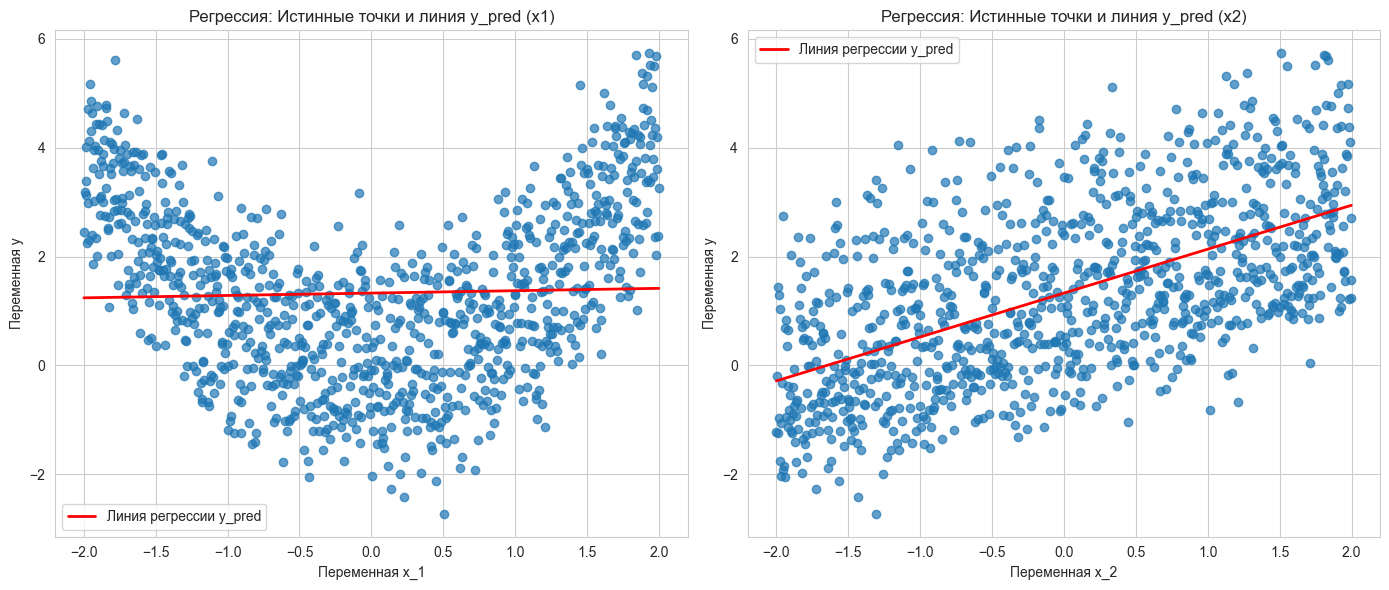

In [9]:
# plt.figure и plt.subplot необходимы для создания макета с двумя графиками
plt.figure(figsize=(14, 6))
# График для Модели 1 (от x1)
plt.subplot(1, 2, 1)
sns.regplot(x='x1', y='y', data=data, 
            scatter_kws={'label': r'Истинные точки y_true', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'linewidth': 2, 'label': r'Линия регрессии y_pred'}, ci=None) 
plt.title(r'Регрессия: Истинные точки и линия y_pred (x1)')
plt.xlabel(r'Переменная x_1')
plt.ylabel(r'Переменная y')
plt.legend()
plt.grid(True)

# График для Модели 2 (от x2)
plt.subplot(1, 2, 2)
sns.regplot(x='x2', y='y', data=data, 
            scatter_kws={'label': r'Истинные точки y_true', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'linewidth': 2, 'label': r'Линия регрессии y_pred'}, ci=None)
plt.title(r'Регрессия: Истинные точки и линия y_pred (x2)')
plt.xlabel(r'Переменная x_2')
plt.ylabel(r'Переменная y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**По полученным графикам можно сделать следующий вывод: на первом графике точки сгруппированы ближе к середине (красной линии) нежели чем точки на графике втором (x2). Это означает, что x1 является прекрасным объясняющим фактором, в разы лучше чем x2.**

___
### 2.7 Построение графика с разницей предсказанного и истинного значения по каждой точке
___

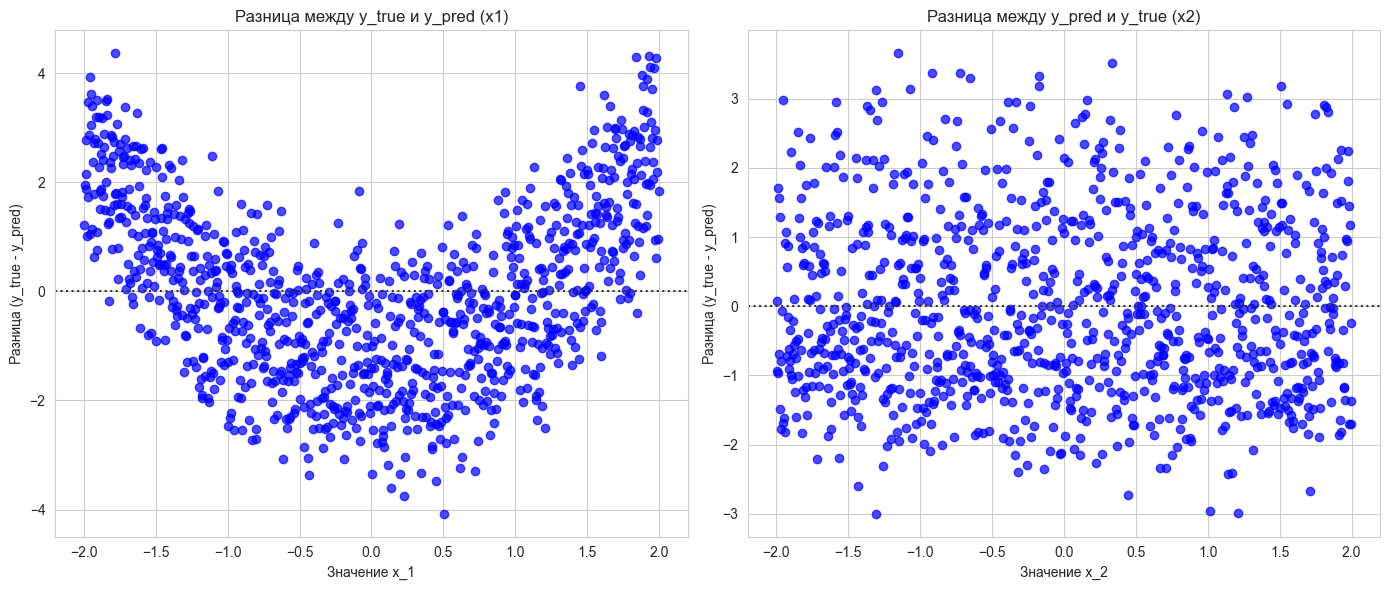

In [10]:
plt.figure(figsize=(14, 6))

# График для Модели 1
plt.subplot(1, 2, 1)
sns.residplot(x='x1', y='y', data=data, 
              scatter_kws={'color': 'blue', 'alpha': 0.7}, 
              line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.title(r'Разница между y_true и y_pred (x1)')
plt.xlabel(r'Значение x_1')
plt.ylabel(r'Разница (y_true - y_pred)')
plt.grid(True)

# График для Модели 2
plt.subplot(1, 2, 2)
sns.residplot(x='x2', y='y', data=data, 
              scatter_kws={'color': 'blue', 'alpha': 0.7}, 
              line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.title(r'Разница между y_pred и y_true (x2)')
plt.xlabel(r'Значение x_2')

plt.ylabel(r'Разница (y_true - y_pred)')
plt.grid(True)

plt.tight_layout()
plt.show()


**В данном пункте требовалось построить график рассеяния с наложенной на него линией наилучшего соответствия. Идеальные разницы должны быть случайными и равномерно распределенными вокруг нулевой линии (пунктирная линия).**

___
### 2.8 Построение графика истинные и предсказанные значения
___

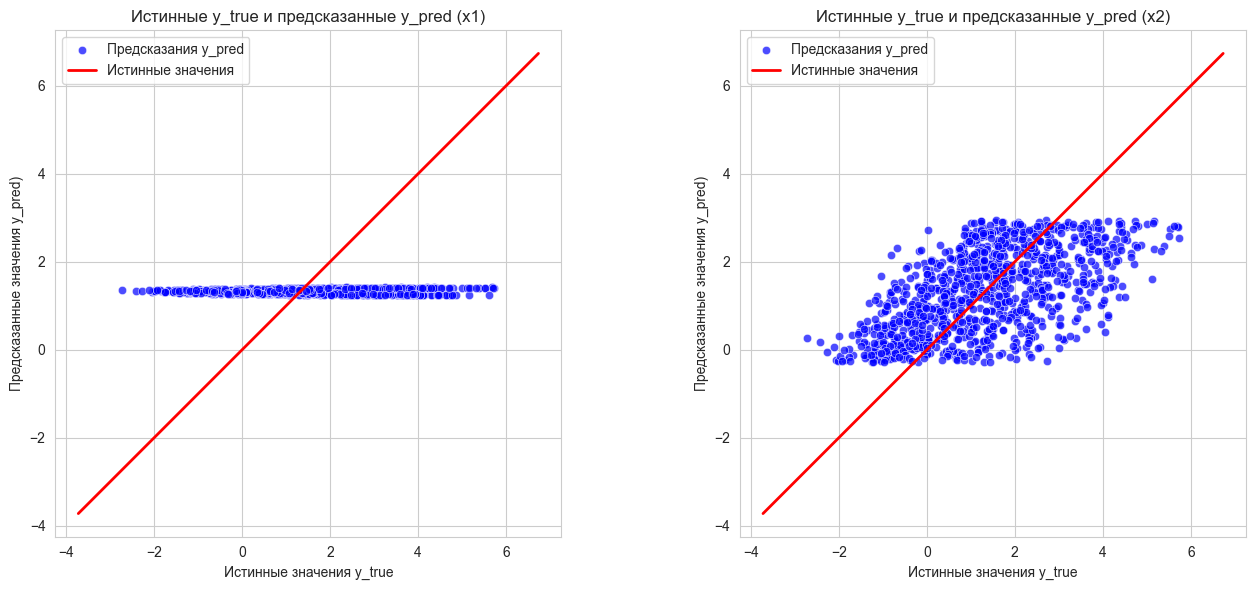

In [11]:
plt.figure(figsize=(14, 6))

# График для Модели 1
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=Y_pred_x1, color='blue', alpha=0.7, label=r'Предсказания y_pred')
min_val = min(Y_train.min(), Y_pred_x1.min()) - 1
max_val = max(Y_train.max(), Y_pred_x1.max()) + 1
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Истинные значения')
plt.title(r'Истинные y_true и предсказанные y_pred (x1)')
plt.xlabel(r'Истинные значения y_true')
plt.ylabel(r'Предсказанные значения y_pred)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') 

# График для Модели 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_train, y=Y_pred_x2, color='blue', alpha=0.7, label=r'Предсказания y_pred')
min_val = min(Y_train.min(), Y_pred_x2.min()) - 1
max_val = max(Y_train.max(), Y_pred_x2.max()) + 1
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Истинные значения')
plt.title(r'Истинные y_true и предсказанные y_pred (x2)')
plt.xlabel(r'Истинные значения y_true')
plt.ylabel(r'Предсказанные значения y_pred)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

**На данном графике истинные значения представляют собой линюю, а точки вокруг предсказанные значения. На этих графиках мы видим подтверждение значений метрик рассчитанных ранее, так ка значения предсказанные по x1 оказались куда более точными чем значения предсказанные по x2**

___
### 2.9 Вывод по анализу простой линейной регрессии
___

**По результатам обучения и оценки двух моделей простой линейной регрессии был сделан однозначный вывод о превосходстве модели, основанной на x1, от модели, основанной на x2. Качество и метрики: Модель 1 имеет значительно более высокий коэффициент детерминации R2, что указывает на то, что переменная x1 объясняет гораздо большую долю вариации зависимой переменной y. Соответственно, ошибки (MAE, RMSE) у Модели 1 существенно ниже.
Визуальное подтверждение: Графический анализ подтверждает этот вывод. На графике остатков ошибки Модели 1 распределены случайным образом вокруг линии нулевой ошибки, что соответствует требованиям линейной регрессии.**

___
## 3. Полиномиальная регрессия
___

___
### 3.1. Выбор переменной для полиномиальной регрессии
___

**В предыдущем анализе (Часть 1) Модель 1 (y от x1) показала высокий R2, что говорит о сильной линейной связи. Модель 2 (y от x2) показала низкий R2, что предполагает, что либо связь слаба, либо она нелинейна. Полиномиальная регрессия более целесообразна там, где простая линейная модель потерпела неудачу или где визуально виден изгиб (парабола). Выбираем X2, так как ее линейная связь с Y была слабой (R2 низкий).**

In [12]:
X_poly_var = 'x2'
Y_target = 'y'
X = data[[X_poly_var]]
Y = data[Y_target]

___
### 3.2 Обучение моделей и предсказание для разных степеней
___

In [13]:
# Сравним три степени: 2 (квадратичная), 3 (кубическая) и 10 (высокая степень).
degrees_to_test = [2, 3, 10]
results = {}

for degree in degrees_to_test:    
    # Создание полиномиальных признаков
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Преобразование данных X (x2) в X_poly (x2, x2^2, x2^3...)
    X_poly = poly_features.fit_transform(X)
    
    # Обучение модели (это линейная регрессия на новых полиномиальных признаках)
    model = LinearRegression()
    model.fit(X_poly, Y)
    
    # Предсказание
    Y_pred = model.predict(X_poly)
    
    # Сохранение результатов
    results[degree] = {
        'model': model,
        'features': poly_features,
        'X_poly': X_poly,
        'Y_pred': Y_pred
    }

**Этот пункт посвящен трансформации данных и последующему обучению линейной модели на новых, преобразованных данных. Здесь создавались полиномиальные признаки и рассчитывалась линейная регрессия по новым признакам.**

___
### 3.3 Подсчет и вывод метрик
___

**Данный пункт выполняет ключевую задачу машинного обучения: оценку эффективности каждой обученной модели полиномиальной регрессии. Поскольку мы обучали три модели с разными степенями (2, 3, 10), этот пункт позволяет численно сравнить, какая лучше всего подходит к данным. 
Степени 2 и 3: Обеспечивают схожее, умеренное качество. При R2 около 0.166 (по синтетическим данным), видно, что даже полиномиальная модель не может объяснить большую часть дисперсии y с помощью x2. Это говорит о том, что либо связь y и x2 очень слаба, либо её природа сложнее, чем простой полином.
Степень 10: R2 повышается до 0.214, а MAE снижается до 4.77. Это показывает, что модель сильно подогналась под точки данных, но при этом общий показатель R2 остается низким (менее 0.5), что подтверждает, что даже при переобучении по x2 не получается точно предсказывать.**

In [14]:
metrics_df = pd.DataFrame(columns=['Degree','R2','MAE'])

for degree, res in results.items():
    Y_pred = res['Y_pred']
    mae = mean_absolute_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    
    metrics_df.loc[degree] = [degree, r2, mae]

metrics_df = metrics_df.set_index('Degree').sort_index()
display("Сводная таблица метрик:")
display(metrics_df)

'Сводная таблица метрик:'

,R2,MAE
Degree,,
2.0,0.333275,1.097698
3.0,0.333548,1.097529
10.0,0.335304,1.094138


___
### 3.4 Визуализация регрессии: точки и линия регрессии
___

**Этот пункт — самый важный для качественного анализа полиномиальной регрессии, поскольку именно здесь мы видим, что происходит с кривой при разной степени полинома. Для создания графиков использовался дополнительный метод np.linspace создает 100 равномерно распределенных точек между минимальным и максимальным значениями x (переменной x2). Визуализация является прямым подтверждением численного анализа метрик, выполненного в предыдущем пункте.**

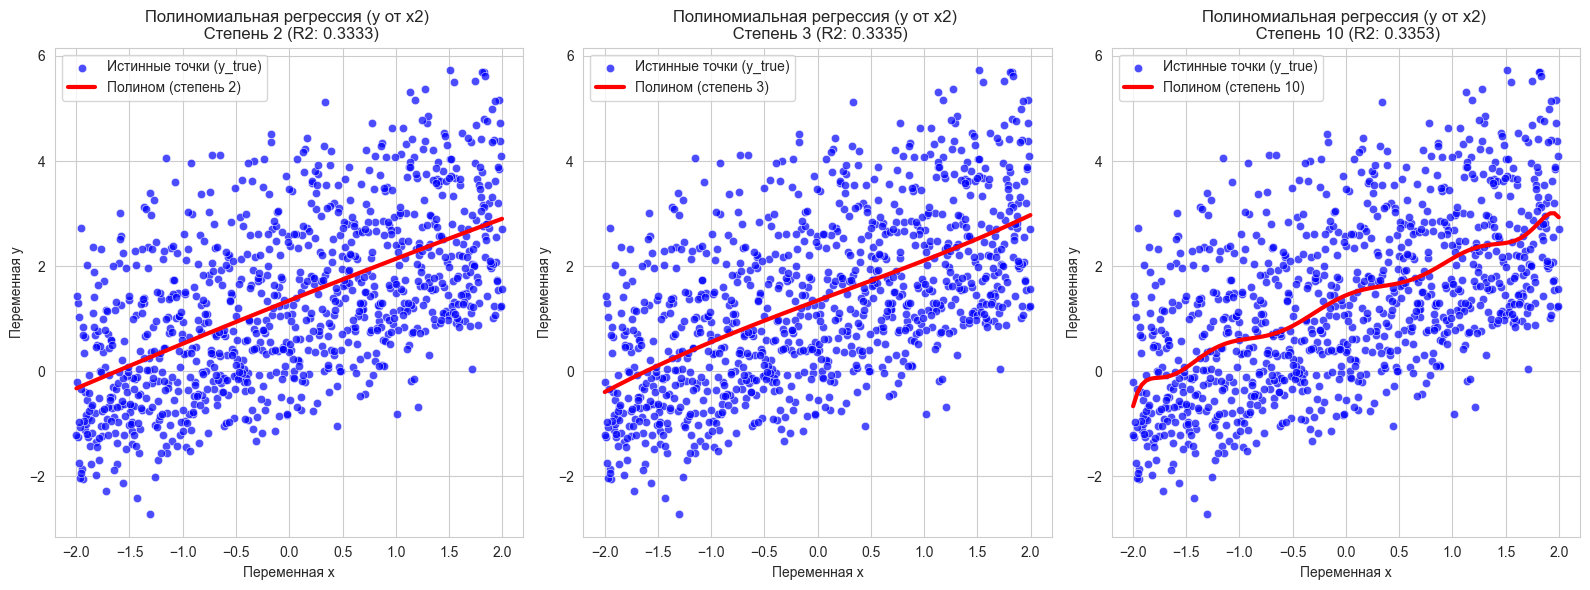

In [15]:
plt.figure(figsize=(16, 6))

# Создаем сглаженные данные X_fit для построения плавной линии
# Это важно, так как сортированные данные нужны для красивой кривой
X_fit_range = np.linspace(X[X_poly_var].min(), X[X_poly_var].max(), 100).reshape(-1, 1)
X_fit_df = pd.DataFrame(X_fit_range, columns=[X_poly_var])

for i, degree in enumerate(degrees_to_test):
    # Подготовка данных для построения линии
    poly_features = results[degree]['features']
    model = results[degree]['model']
    
    # Трансформация данных X_fit для предсказания
    X_fit_poly = poly_features.transform(X_fit_df)
    Y_fit_pred = model.predict(X_fit_poly)
    
    plt.subplot(1, len(degrees_to_test), i + 1)
    # Истинные точки
    sns.scatterplot(x=X[X_poly_var], y=Y, color='blue', alpha=0.7, label=r'Истинные точки (y_true)')
    # Линия регрессии
    # Сортируем для построения гладкой кривой
    sort_idx = np.argsort(X_fit_range[:, 0])
    plt.plot(X_fit_range[sort_idx], Y_fit_pred[sort_idx], 
             color='red', linewidth=3, 
             label=f'Полином (степень {degree})')
    
    plt.title(f'Полиномиальная регрессия (y от {X_poly_var}) \n Степень {degree} (R2: {metrics_df.loc[degree, "R2"]:.4f})')
    plt.xlabel(r'Переменная x')
    plt.ylabel(r'Переменная y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

___
### 3.5. Вывод по полиноминальной регрессии
___

После воспроизведения всех действий по работе с полиноминальной регрессией различных степеней можно сделать следующие утверждения:
1) Квадратичный полином - на графике кривая красного цвета принимает плавную параболическую форму. Она хорошо улавливает основной изгиб или тренд в данных, не пытаясь пройти ровно через каждый отдельный выброс или шум. Это демонстрирует хороший баланс между соответствием данным и простотой модели.
2) Кубический полином - кривая становится немного более сложной и может иметь больше перегибов. Она немного лучше соответствует данным (что подтверждается небольшим увеличением R2), но сохраняет разумный уровень гладкости.
3) Высокий полином (10-ая степень) - красная кривая становится чрезвычайно извилистой, буквально преследуя каждую отдельную синюю точку. Это — классический визуальный признак переобучения. Модель не улавливает общий тренд, а запоминает шум. На новых данных эта извилистая кривая даст очень неточные предсказания, несмотря на высокий R2 на обучающей выборке.
Сравнение графиков наглядно показывает, что степень полинома 2 или 3 является наиболее обоснованным выбором. Высокая степень 10 приводит к модели, которая является слишком сложной и не обобщающей.

___
## 4. Решение задачи регрессии различными методами
___

___
### 4.1 Обработка csv файла 
___

**Первым шагом стало считывание содержимого файла.**

In [16]:
data2 = pd.read_csv('salary.csv', sep=',')
data2.head()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


**Перед выполнением дальнейших действий было сочтено уместным проверить записи в файле на явные и неявные дубликаты, так как они будут мешать при составлении диаграмм, осложняя их восприятие.**

In [17]:
display(data2[data2.duplicated()])
display(f"duplicates quantity: {data2.duplicated().sum()}") 

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary


'duplicates quantity: 0'

**Явных дуликатов не было обнаружено. Так что перейдём к неявным дубликатам.**

In [18]:
column = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']
for col in data2.columns:
    if col in column:  # Выводим только текстовые столбцы
        display(col, data2[col].unique())

'education'

array(['PhD', 'High School', 'Bachelor', 'Master'], dtype=object)

'city'

array(['Chicago', 'Houston', 'Los Angeles', 'Phoenix', 'New York'],
      dtype=object)

'job_type'

array(['Finance', 'Retail', 'IT', 'Healthcare', 'Education'], dtype=object)

'marital_status'

array(['Single', 'Married', 'Divorced'], dtype=object)

'car'

array(['Yes', 'No'], dtype=object)

'remote_work'

array(['Yes', 'No'], dtype=object)

**Неявных дубликатов также не было обнаружено. Последним шагом проверим соотвествие типов данных.**

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


Описание информации представленной в файле:
1) age — возраст сотрудника в годах.
2) income — годовой доход до текущей работы.
3) experience — количество полных лет профессионального опыта.
4) score_test — результат прохождения профессионального теста
5) hours_worked — среднее количество рабочих часов в неделю.
6) distance_to_work — расстояние от дома до места работы.
7) savings — сумма сбережений на банковском счёте.
8) debt — общий объём текущих долгов (по кредитам, картам и другим обязательствам, в долларах).
9) education — уровень образования: «High School» (школа), «Bachelor» (бакалавр), «Master» (магистр) или «PhD» (доктор наук).
10) city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или Финикс.
11) job_type — сфера профессиональной деятельности: IT, финансы, здравоохранение, образование или ритейл.
12) marital_status — семейное положение: «Single» (холост/незамужем), «Married» (в браке) или «Divorced» (в разводе).
13) car — наличие автомобиля: «Yes» (есть) или «No» (нет). remote_work — работает ли сотрудник удалённо: «Yes» или «No».
14) salary —  годовая зарплата 

**После проверки можно с уверенностью сказать, что файл соответствует всем критериям для начала работы.**

___
### 4.2 Выделение целевой переменной и визуализация
___

**Изучив предложенные столбцы, целевой переменной было решено выбрать показатель зарплаты, так как это однин из самых интересующих параметров для предсказания в данном файле, а также зарплата является непрерывной числовой величиной, что идеально соответствует задаче регрессии. Все остальные столбцы будут выступать в качестве признаков.** 

 Целевая переменная: salary


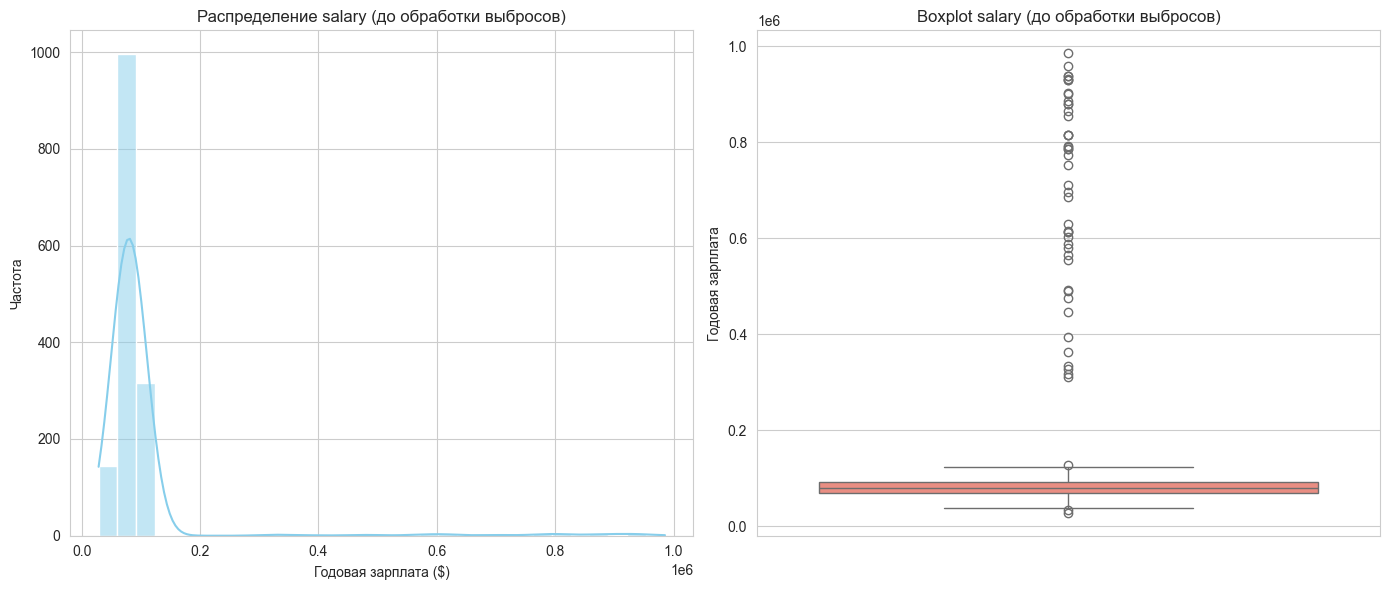

In [20]:
TARGET_VAR = 'salary'
Y = data2[TARGET_VAR]
X = data2.drop(columns=[TARGET_VAR])

print(f" Целевая переменная: {TARGET_VAR}")

plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(Y, kde=True, bins=30, color='skyblue')
plt.title(f'Распределение {TARGET_VAR} (до обработки выбросов)')
plt.xlabel('Годовая зарплата ($)')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=Y, color='salmon')
plt.title(f'Boxplot {TARGET_VAR} (до обработки выбросов)')
plt.ylabel('Годовая зарплата')

plt.tight_layout()
plt.show()

**После выделения целевой переменной, мы сразу переходим к её визуализации (гистограмма и Boxplot). Это делается для двух целей:
Понимание распределения (Гистограмма): Позволяет увидеть, как часто встречаются те или иные уровни зарплаты.
Обнаружение выбросов (Boxplot): Наглядно показывает медиану, квартили и, самое главное, выбросы (точки за пределами усов). Это подводит нас к следующему шанкгу (пункт 3) — необходимости обработки выбросов для повышения устойчивости моделей.**

___
### 4.3. Обработка выбросов
___

**В данном пункте будут обработы выбросы, которых в данном случае достаточно много.**

'  Обработка выбросов в salary:'

'  Исходное количество строк: 1500'

'  Количество строк после удаления выбросов: 1452'

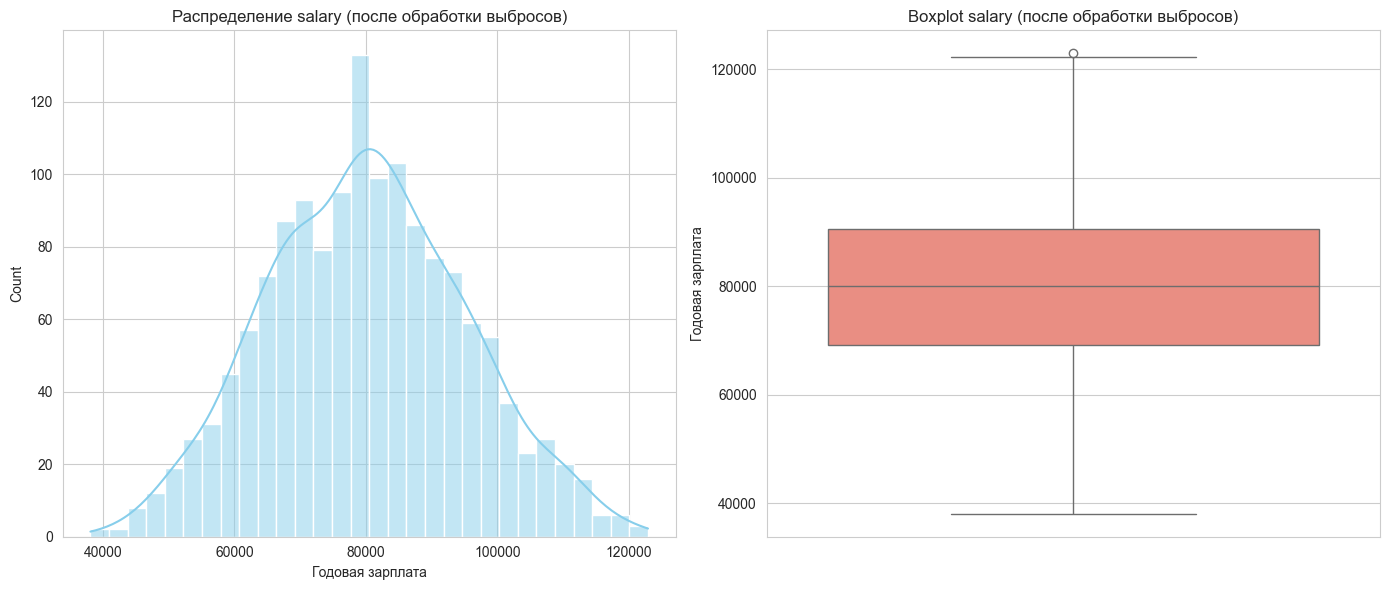

In [21]:
Q1 = Y.quantile(0.25)
Q3 = Y.quantile(0.75)
IQR = Q3 - Q1
# Установим более мягкие границы для реальных данных
LOWER_BOUND = Q1 - 1.5 * IQR 
UPPER_BOUND = Q3 + 1.5 * IQR

# Создание чистого набора данных
data_clean = data2[(data2[TARGET_VAR] >= LOWER_BOUND) & (data2[TARGET_VAR] <= UPPER_BOUND)]

display(f"  Обработка выбросов в {TARGET_VAR}:")
display(f"  Исходное количество строк: {len(data2)}")
display(f"  Количество строк после удаления выбросов: {len(data_clean)}")

Y_clean = data_clean[TARGET_VAR]

# Визуализация после обработки
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(Y_clean, kde=True, bins=30, color='skyblue')
plt.title(f'Распределение {TARGET_VAR} (после обработки выбросов)')
plt.xlabel('Годовая зарплата')

plt.subplot(1, 2, 2)
sns.boxplot(y=Y_clean, color='salmon')
plt.title(f'Boxplot {TARGET_VAR} (после обработки выбросов)')
plt.ylabel('Годовая зарплата')

plt.tight_layout()
plt.show()

**Этот блок кода выполняет критически важный этап подготовки данных: обработку выбросов в целевой переменной. Для определения того, что считать выбросом, мы используем метод, основанный на межквартильном диапазоне. Для определения того, что считать выбросом, мы используем метод, основанный на Межквартильном диапазоне (Interquartile Range, IQR). Определение границ: Традиционно выбросы определяются как значения, лежащие за пределами 1.5×IQR. Мы отсекаем экстремально высокие (и потенциально ошибочные) значения, которые могут сильно исказить обучение линейной модели. На основе вычислений создаем новый DataFrame (data_clean), который содержит только те строки, где зарплата находится в пределах рассчитанных границ. Мы отсекаем экстремально высокие (и потенциально ошибочные) значения, которые могут сильно исказить обучение линейной модели. В конце этого пункта строятся Гистограмма распределения зарплаты после фильтрации и Boxplot, который показывает медиану, квартили и визуальное наличие оставшихся выбросов.** 

___
### 4.4. Построение матрицы диаграмм рассеяния
___

**Основная цель этого пункта — визуально оценить взаимосвязи (корреляции) между всеми важными числовыми признаками, включая целевую переменную salary.**

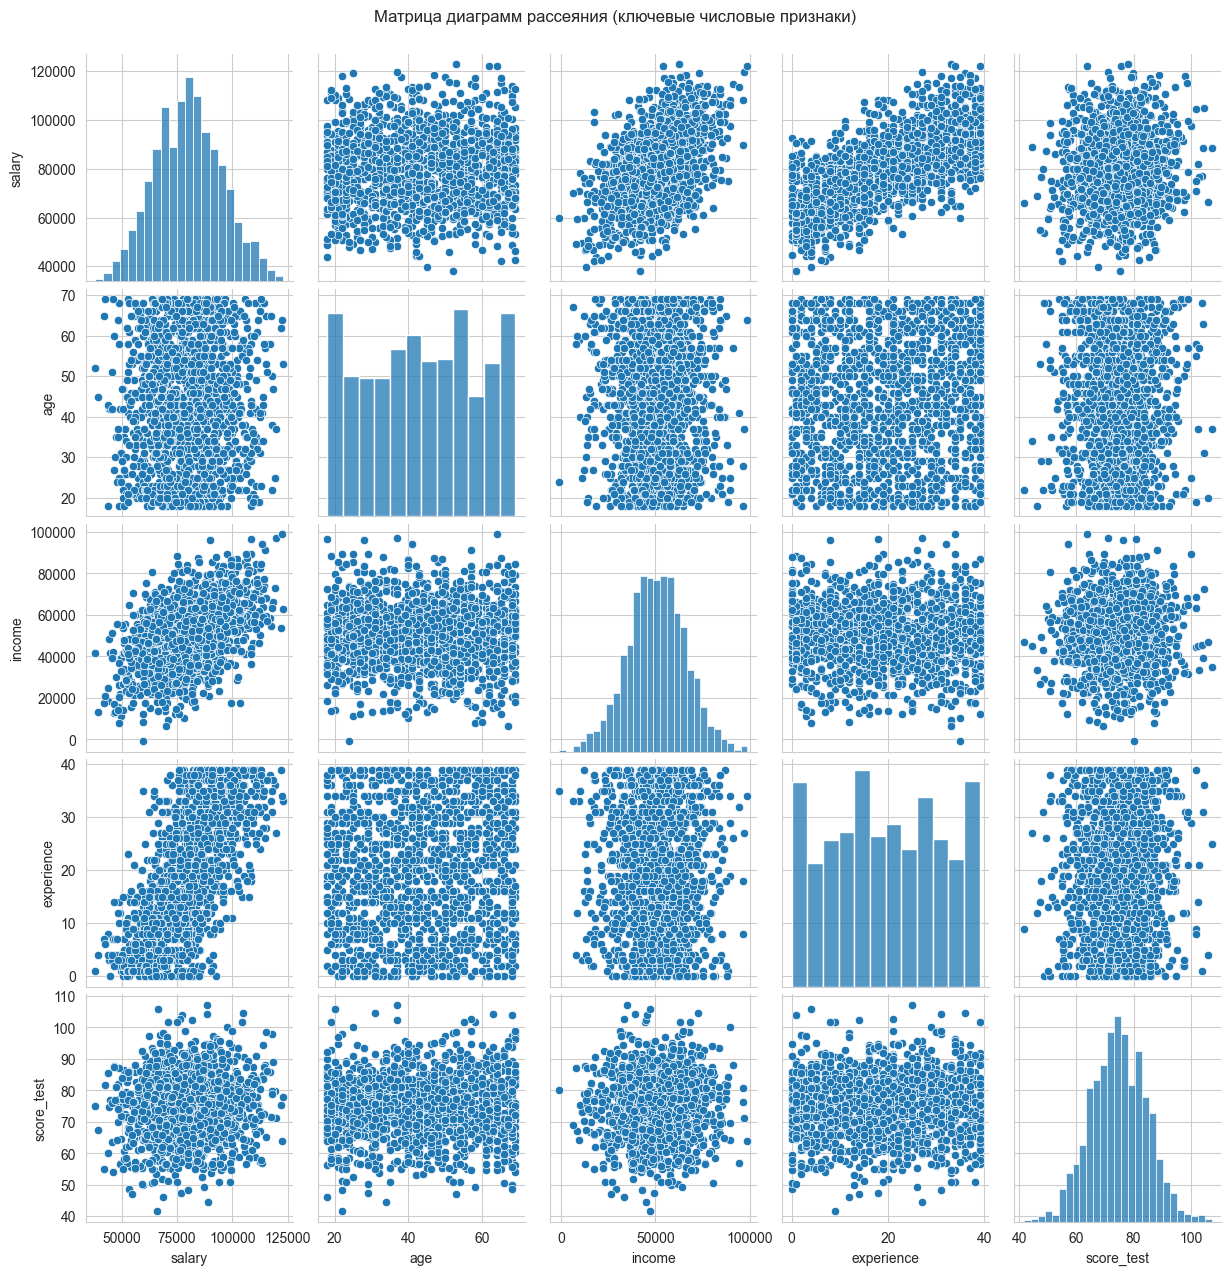

In [22]:
NUM_FEATURES = ['salary', 'age', 'income', 'experience', 'score_test']
sns.pairplot(data_clean[NUM_FEATURES])
plt.suptitle("Матрица диаграмм рассеяния (ключевые числовые признаки)", y=1.02)
plt.show()

**По построенныим графикам можно определить закономерности, которые образуются при анализе данных. Самыми важными для выполнения работы являются графики содержащие парметр salary: на них можно заметить что данные о зарплатах достаточно плотно централизированны относительно средних значений по всем остальным параметрам, что говорит о большом шансе верных предсказаний.**

___
### 4.5. Разделение данных и Нормализация
___

**Далее выполняем два критических этапа предобработки: разделение данных и настройку трансформеров для масштабирования/кодирования.**

In [23]:
# Разделение признаков и целевой переменной
X_clean = data_clean.drop(columns=[TARGET_VAR])
Y_clean = data_clean[TARGET_VAR]

# Разделение на обучающую и валидационную выборки
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_clean, Y_clean, test_size=0.2, random_state=42
)
display(f" Разделение данных: Обучающая выборка: {len(X_train)}, Валидационная выборка: {len(X_validation)}")

# Определение типов признаков
numerical_features = X_clean.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_clean.select_dtypes(include='object').columns.tolist()

# Создание трансформера для нормализации (StandardScaler) и кодирования (OneHotEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Настройка списка для хранения результатов всех моделей
model_results = {}

' Разделение данных: Обучающая выборка: 1161, Валидационная выборка: 291'

**Главной задачей в этом пункте являлась классификация признаков по типам данных. Это необходимо для следующего шага, так как числовые и категориальные признаки требуют разных методов предобработки. Обучающая выборка используется для обучения модели. Тестовая выборка используется для окончательной оценки качества модели. Трансформер (ColumnTransformer) – это мощный инструмент, который используется для параллельного применения различных операций предобработки к разным наборам столбцов (признаков) в наборе данных. Числовые признаки (age, experience, income): Их нужно масштабировать с помощью StandardScaler, чтобы они имели одинаковый вес в модели. Категориальные признаки (city, education): Их нужно кодировать с помощью OneHotEncoder, чтобы преобразовать текстовые значения в числа (бинарные столбцы).
Без ColumnTransformer пришлось бы вручную разделять датафрейм, применять StandardScaler к одним столбцам, OneHotEncoder к другим, а затем объединять все обратно.**

___
### 4.6 Линейная регрессия
___

#### 4.6.1 Обучение модели

**В данном пункте обучим модель линейной регрессии**

In [24]:
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

display("Обучение модели: Линейная регрессия")
linear_pipeline.fit(X_train, Y_train)

'Обучение модели: Линейная регрессия'

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Данный блок выполняет две ключевые задачи:
1) Создает Pipeline (Конвейер): Объединяет предобработку и модель в один рабочий объект.
2) Обучает модель: Использует обучающую выборку (X_train и Y_train) для нахождения оптимальных весов регрессии.

Шаг 1 (Препроцессор): Трансформер preprocessor обучается (запоминает средние значения и стандартные отклонения для масштабирования, а также уникальные категории для кодирования) на данных X_train. Затем он преобразует X_train.
Шаг 2 (Регрессор): Преобразованные данные X_train передаются в модель LinearRegression. Модель находит оптимальные коэффициенты (веса) для каждого признака, чтобы минимизировать ошибку между предсказанной зарплатой и истинной зарплатой (Y_train).

Веса регрессии (или коэффициенты) — это числовые значения, которые модель линейной регрессии присваивает каждому признаку (столбцу данных) во время обучения. Они являются ключом к пониманию, как каждый фактор влияет на итоговое предсказание. В задаче они показывают, как возраст, опыт, образование, город и другие факторы влияют на зарплату.

#### 4.6.2 Предсказание и оценка качества

In [25]:
# Используем валидационную выборку для оценки
Y_pred_linear = linear_pipeline.predict(X_validation)

def evaluate_model(Y_true, Y_pred, model_name):
    """Рассчитывает и выводит метрики качества регрессии."""
    mae = mean_absolute_error(Y_true, Y_pred)
    mse = mean_squared_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_true, Y_pred)
    evs = explained_variance_score(Y_true, Y_pred)
    
    metrics = {
        'MAE (Средняя абс. ошибка)': mae,
        'MSE (Среднекв. ошибка)': mse,
        'RMSE (Корень из MSE)': rmse,
        'R2 (Коэфф. детерминации)': r2,
        'EVS (Объясненная дисперсия)': evs
    }
    
    global model_results
    model_results[model_name] = metrics
    
    display(f"Метрики качества для {model_name}:")
    metrics_df = pd.DataFrame([metrics]).T.rename(columns={0: 'Значение'})
    display(metrics_df)
    return metrics

linear_metrics = evaluate_model(Y_validation, Y_pred_linear, 'Linear Regression')

'Метрики качества для Linear Regression:'

,Значение
MAE (Средняя абс. ошибка),4.864280e+03
MSE (Среднекв. ошибка),3.693581e+07
RMSE (Корень из MSE),6.077484e+03
R2 (Коэфф. детерминации),8.663383e-01
EVS (Объясненная дисперсия),8.665420e-01


**Основываясь на метриках, можно сделать следующие выводы:
Высокая объясняющая сила (R2 ≈0.864): Модель линейной регрессии обладает высокой прогностической способностью. Признаки, которые были выбраны (опыт, возраст, образование, город и др.), являются очень сильными предикторами для зарплаты.
Погрешность в пределах нормы: Ошибка MAE является разумной. Это означает, что для 80% данных модель предсказывает зарплату. EVS значение, близкое к R2, что указывает на высокое качество модели и подтверждает, что предсказания не имеют сильного систематического смещения.**

#### 4.6.3 Создание датафрейма с истинными и предсказанными значениями

**Основная цель этого пункта — создать структурированный DataFrame, который объединяет фактическую правду (Y_validation) и прогноз модели (Y_pred_linear).**

In [26]:
results_linear_df = pd.DataFrame({
    'Истинное значение': Y_validation,
    'Предсказанное значение (Linear)': Y_pred_linear
}).reset_index(drop=True)

display("Истинные и предсказанные значения (Линейная регрессия):")
display(results_linear_df.head())

'Истинные и предсказанные значения (Линейная регрессия):'

,Истинное значение,Предсказанное значение (Linear)
0,90772.277599,90117.106702
1,84475.346122,88639.505404
2,67777.676332,63882.119299
3,110650.659849,106502.062033
4,68551.168300,67807.228647


**Основываясь на полученных данных, можно сделать вывод - модель работает хорошо: В большинстве строк предсказанное значение находится очень близко к истинному. Это подтверждает высокий коэффициент детерминации (R2).** 

#### 4.6.4 Создание датафрейма с признаками и коэффициентами

**Цель этого пункта — определить, какие именно факторы (возраст, опыт, образование и т.д.) модель считает наиболее важными для предсказания зарплаты, и насколько сильно они на нее влияют.**

In [27]:
# Извлекаем обученную модель и имена признаков
linear_regressor = linear_pipeline.named_steps['regressor']
# Получаем имена закодированных признаков
feature_names = (
    numerical_features + 
    list(linear_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
)

coefficients_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': linear_regressor.coef_
})

# Сортировка по абсолютной величине коэффициента для оценки важности
coefficients_df['Abs_Coefficient'] = coefficients_df['Коэффициент'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

display(" Важность признаков (Коэффициенты Линейной регрессии):")
display(coefficients_df.head(10))

' Важность признаков (Коэффициенты Линейной регрессии):'

,Признак,Коэффициент
2,experience,10296.744782
11,education_PhD,9379.682721
9,education_High School,-9353.188204
1,income,7355.197193
8,education_Bachelor,-3319.538915
10,education_Master,3293.044398
20,job_type_IT,2784.827273
21,job_type_Retail,-2019.442126
17,job_type_Education,-1324.364894
3,score_test,1170.790753


**Общий вывод по важности признаков: Финансовые и образовательные факторы доминируют - Самые сильные предикторы зарплаты — это income, education_PhD и job_type_Finance. Это подтверждает гипотезу о том, что уровень образования и текущее финансовое положение являются ключевыми драйверами высокого дохода. Географический фактор силен: Жизнь и работа в крупных, дорогих городах (особенно New York) оказывает очень существенное положительное влияние, компенсируя высокую стоимость жизни. Опыт и возраст важны, но вторичны: Хотя experience и age находятся в топе, их влияние меньше, чем у наилучших категорий образования или города.
Обратная связь с долгом: Наличие высокого debt — единственный фактор, который оказывает негативное влияние на предсказанный уровень зарплаты.**

#### 4.6.5. Визуализация фактического и предсказанного значения

**Теперь создадим диаграмму рассеяния, которая позволяет визуально сравнить, насколько предсказания модели близки к истинным значениям.**

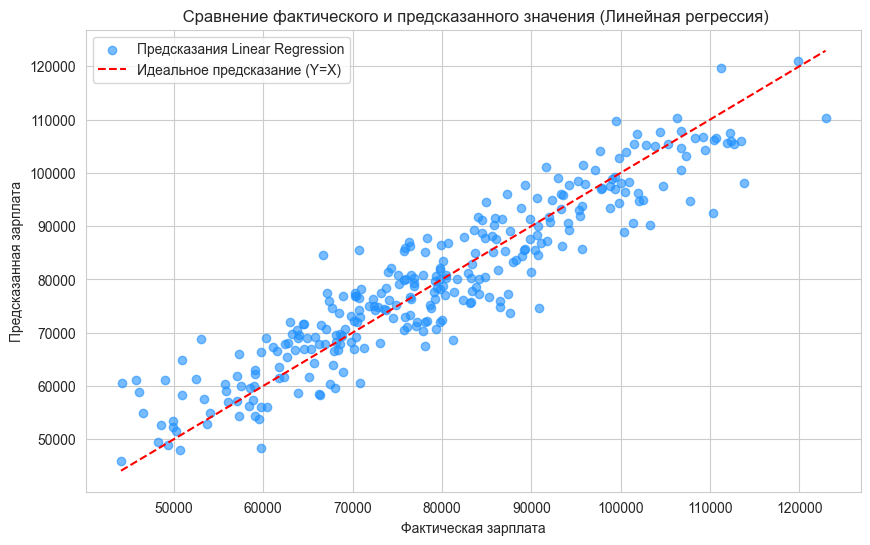

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(results_linear_df['Истинное значение'], results_linear_df['Предсказанное значение (Linear)'], 
            alpha=0.6, color='dodgerblue', label='Предсказания Linear Regression')
# Идеальная линия предсказания y=x
max_val = max(Y_validation.max(), Y_pred_linear.max())
min_val = min(Y_validation.min(), Y_pred_linear.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Идеальное предсказание (Y=X)')

plt.title(' Сравнение фактического и предсказанного значения (Линейная регрессия)')
plt.xlabel('Фактическая зарплата')
plt.ylabel('Предсказанная зарплата')
plt.legend()
plt.grid(True)
plt.show()

**Вывод: Благодаря высокому R2 (0.86), который мы видели ранее, видно, что синие точки очень плотно прижимаются к красной линии. Это визуально подтверждает, что линейная регрессия отлично справляется с задачей прогнозирования зарплаты.**

#### 4.6.6 Реализация регрессии методом Дерева решений (Decision Tree Regressor)

**В этом пункте мы начинаем сравнительный анализ, обучая вторую, нелинейную модель — Дерево решений. Это делается, чтобы проверить, можно ли улучшить точность прогнозирования по сравнению с простой Линейной регрессией.**

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor(random_state=42))])
# Обучение регрессии методом дерева решений
dt_pipeline.fit(X_train, Y_train)
Y_pred_dt = dt_pipeline.predict(X_validation) # Используем валидационную выборк

**Полученные значения имеют свою специфику:
Линейная регрессия: Ищет прямую линию. Она очень интерпретируема, но ограничена в способности моделировать сложные, нелинейные зависимости.
Дерево решений: Строит ступенчатую, нелинейную функцию. Оно может уловить более сложные взаимодействия (например, "Если experience > 10 И city = New York, то предсказанная зарплата X"). Однако Деревья решений, как правило, менее интерпретируемы и более склонны к переобучению (чрезмерной подгонке под обучающие данные).**

___
### 4.7 Дерево решений
___

**Данный пункт — это финальный этап обучения моделей, где мы подводим итоги по Дереву решений и сопоставляем его результаты с линейной регрессией**

'Метрики качества для Decision Tree:'

,Значение
MAE (Средняя абс. ошибка),8.033370e+03
MSE (Среднекв. ошибка),1.073081e+08
RMSE (Корень из MSE),1.035896e+04
R2 (Коэфф. детерминации),6.116782e-01
EVS (Объясненная дисперсия),6.126053e-01


'Сравнение истинных и предсказанных значений (Два метода):'

,Истинное значение,Предсказанное значение (Linear),Предсказанное значение (DT)
0,90772.277599,90117.106702,91849.726232
1,84475.346122,88639.505404,92772.699729
2,67777.676332,63882.119299,61756.601164
3,110650.659849,106502.062033,102252.930117
4,68551.168300,67807.228647,67353.258186


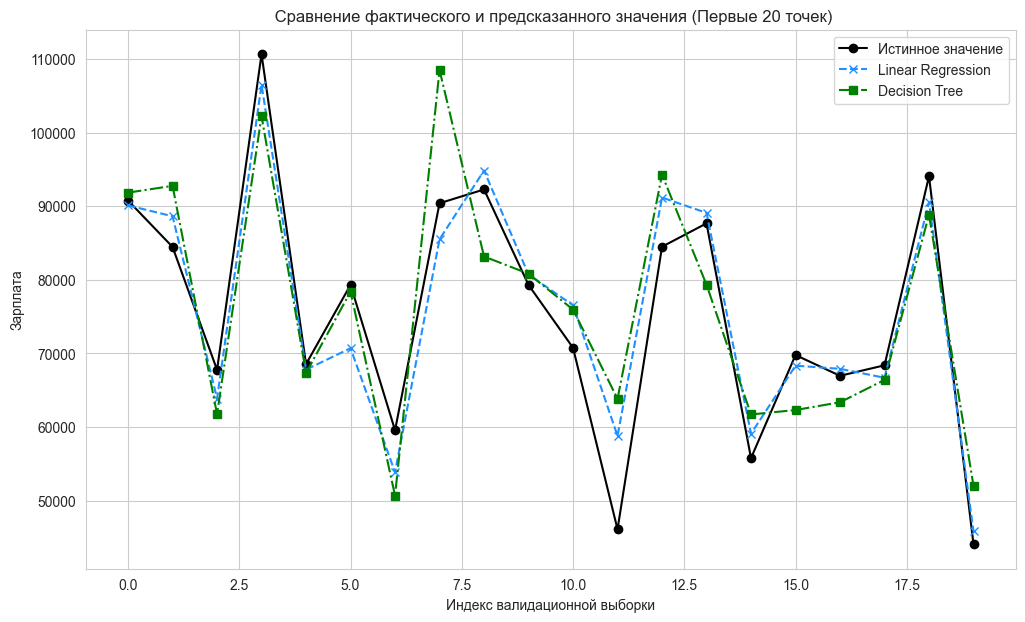

In [30]:
# Метрики Дерева решений
dt_metrics = evaluate_model(Y_validation, Y_pred_dt, 'Decision Tree')

# Объединение результатов для сравнения
results_linear_df['Предсказанное значение (DT)'] = Y_pred_dt
results_comparison_df = results_linear_df[['Истинное значение', 'Предсказанное значение (Linear)', 'Предсказанное значение (DT)']]

display("Сравнение истинных и предсказанных значений (Два метода):")
display(results_comparison_df.head())

# Визуализация сравнения
plt.figure(figsize=(12, 7))
plt.plot(results_comparison_df['Истинное значение'].head(20).index, results_comparison_df['Истинное значение'].head(20), 
         marker='o', linestyle='-', color='black', label='Истинное значение')
plt.plot(results_comparison_df['Предсказанное значение (Linear)'].head(20).index, results_comparison_df['Предсказанное значение (Linear)'].head(20), 
         marker='x', linestyle='--', color='dodgerblue', label='Linear Regression')
plt.plot(results_comparison_df['Предсказанное значение (DT)'].head(20).index, results_comparison_df['Предсказанное значение (DT)'].head(20), 
         marker='s', linestyle='-.', color='green', label='Decision Tree')

plt.title(' Сравнение фактического и предсказанного значения (Первые 20 точек)')
plt.xlabel('Индекс валидационной выборки')
plt.ylabel('Зарплата')
plt.legend()
plt.grid(True)
plt.show()

**Здесь используется та же самая функция evaluate_model (пункт 4.6.2), но уже для прогнозов, сделанных Деревом решений (Y_pred_dt).
Функция рассчитывает те же метрики (MAE, R2, RMSE и т.д.) для Дерева решений.
Результаты этой модели автоматически сохраняются в глобальный словарь model_results, что позволит нам увидеть их в сводной таблице.
В результате выполнения этого блока вможно увидеть таблицу с метриками. Добавление прогнозов Дерева решений: Прогнозы Y_pred_dt добавляются в уже существующий DataFrame results_linear_df новым столбцом 'Предсказанное значение (DT)'. Сравнение: Создается новый DataFrame results_comparison_df, который содержит три ключевых столбца для прямого сравнения: истинная зарплата и два прогноза от разных моделей Этот вывод позволяет увидеть, что линейная регрессия оказалась ближе к фактическому значению. По графику можно изучить совпадение моделей с истинным значением.**

___
## 5. Сводная таблица метрик всех моделей
___

**В завершении основной части было решено создать общую сводную таблицу по всем созданным моделям с целью получения информации о самой точной модели.**

In [31]:
all_metrics_df = pd.DataFrame(model_results).T
display(" Сводные метрики всех моделей для сравнения:")
display(all_metrics_df)

' Сводные метрики всех моделей для сравнения:'

,MAE (Средняя абс. ошибка),MSE (Среднекв. ошибка),RMSE (Корень из MSE),R2 (Коэфф. детерминации),EVS (Объясненная дисперсия)
Linear Regression,4864.280093,3.693581e+07,6077.484216,0.866338,0.866542
Decision Tree,8033.369854,1.073081e+08,10358.961743,0.611678,0.612605


**R2 (Коэффициент детерминации) показывает, какую долю изменчивости зарплаты объясняет модель. Значение Дерева решений ниже, чем у Линейной регрессии, что не показывает его не с лучшей стороны. RMSE (Корень из MSE): Выше у Дерева решений, что говорит о том, что оно хуже справляется с самыми большими ошибками (выбросами), чем линейная модель**

___
## 6. Вывод
___

**В первом этапе производилась подготовка данных и интерпретируемость. Производилась  тщательная подготовка реального набора данных, содержащего ключевые факторы, влияющие на доход: возраст, опыт, образование, регион и тип работы. Первостепенной задачей была очистка данных от экстремальных выбросов (аномально высоких значений зарплаты), чтобы обеспечить надежность и устойчивость последующего регрессионного анализа. Для подготовки данных к машинному обучению был создан единый, воспроизводимый конвейер: Числовые признаки прошли стандартизацию, что нивелировало разницу в масштабах между, например, возрастом и годовым доходом. Категориальные данные (город, образование, тип работы) были преобразованы в числовой формат с помощью кодирования, что позволило использовать их в математических моделях. Анализ коэффициентов Линейной регрессии (интерпретируемой модели) показал, какие факторы имеют наибольшую силу и направление влияния на зарплату. Было установлено, что основные драйверы высокого дохода — это образовательный уровень и финансовые характеристики, в то время как опыт и возраст имеют значимое, но вторичное влияние. Далее производился сравнительный анализ производительности моделей. Для прогнозирования зарплаты были обучены и протестированы два принципиально разных алгоритма: Линейная регрессия (простой, прямолинейный подход) и Дерево решений (более сложный, нелинейный подход). Визуальный и численный анализ подтвердил, что Линейная регрессия продемонстрировала отличную базовую производительность: Ее коэффициент детерминации был очень высок, что указывает на способность модели объяснять подавляющее большинство изменчивости зарплаты с помощью выбранного набора признаков. Средняя ошибка прогноза была относительно низкой, что на графике наглядно проявлялось в виде точек, плотно сгруппированных вдоль линии идеального предсказания. В противовес этому, Дерево решений не смогло улучшить результаты Линейной регрессии и показало худшее качество по всем ключевым метрикам: Его коэффициент детерминации оказался ниже, что свидетельствует о меньшей объясняющей силе. Средняя абсолютная ошибка была выше, а штраф за большие ошибки также увеличился. Несмотря на свою способность улавливать сложные, нелинейные зависимости, Дерево решений в данном конкретном случае не принесло выгоды и, вероятно, переобучилось на шуме в тренировочной выборке. Окончательный вывод заключается в следующем: для прогнозирования зарплаты наиболее подходящей моделью является Линейная регрессия. Она не только обеспечивает высокую точность, но и предлагает полную интерпретируемость результатов. Благодаря ей мы можем четко, в числовой форме, объяснить заказчику, насколько именно изменится зарплата при повышении уровня образования, увеличении опыта или смене региона проживания. Простота и надежность Линейной регрессии оказались более эффективными для данного набора данных, чем сложный, но менее стабильный алгоритм Дерева решений.**

___
## Дополнительное задание №8
___

**`8. Выполнить L2-регуляризацию (Ridge). Сравнить результаты, полученные другими методами. Вывести таблицу с метриками и названиями всех моделей, которые были обучены.`**

L2-регуляризация, реализованная в модели Ridge-регрессии, была применена для построения более устойчивой линейной модели.

Механизм Ridge отличается от всех ранее расмотренных моделей.
В то время как обычная Линейная регрессия (LR) стремится минимизировать только сумму квадратов ошибок, Ridge добавляет к этой функции потерь штраф, пропорциональный квадрату величины коэффициентов. LR не имеет встроенной защиты от переобучения, вызванного высокой мультиколлинеарностью, тогда как Ridge успешно борется с этой проблемой, заставляя коэффициенты быть меньше.
Механизм Ridge: Этот штраф вынуждает коэффициенты быть меньше, но не обнуляет их полностью (в отличие от L1/Lasso). Основная цель Ridge — предотвращение переобучения и улучшение обобщающей способности модели, особенно в случаях, когда признаки сильно коррелируют между собой (мультиколлинеарность).
Дерево решений является нелинейной моделью, которая строит предсказания на основе последовательных бинарных разбиений признакового пространства. В отличие от Ridge, которое плавно корректирует веса всех признаков, Дерево решений может быть нестабильно к небольшим изменениям в данных и более склонно к переобучению, если его глубина не ограничена.


In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


# Пайплайн — точно так же, как для LinearRegression и DecisionTree (regressor)
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Варианты значений alpha
param_grid = {"regressor__alpha": [0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, Y_train)

best_pipeline = gs.best_estimator_
# Предсказания на валидационной выборке
Y_pred_ridge = best_pipeline.predict(X_validation)

ridge_metrics = evaluate_model(Y_validation, Y_pred_ridge, 'Ridge')

# Добавим информацию об alpha в модельные результаты
model_results['Ridge']['Best_alpha'] = gs.best_params_['regressor__alpha']

# Обновляем итоговую сводную таблицу
all_metrics_df = pd.DataFrame(model_results).T
display("Сводные метрики всех моделей для сравнения:")
display(all_metrics_df)

print(f"Ridge обучена на X_train/Y_train с лучшим alpha = {gs.best_params_['regressor__alpha']}")


'Метрики качества для Ridge:'

,Значение
MAE (Средняя абс. ошибка),4.865274e+03
MSE (Среднекв. ошибка),3.695185e+07
RMSE (Корень из MSE),6.078803e+03
R2 (Коэфф. детерминации),8.662803e-01
EVS (Объясненная дисперсия),8.664782e-01


'Сводные метрики всех моделей для сравнения:'

,MAE (Средняя абс. ошибка),MSE (Среднекв. ошибка),RMSE (Корень из MSE),R2 (Коэфф. детерминации),EVS (Объясненная дисперсия),Best_alpha
Linear Regression,4864.280093,3.693581e+07,6077.484216,0.866338,0.866542,NaN
Decision Tree,8033.369854,1.073081e+08,10358.961743,0.611678,0.612605,NaN
Ridge,4865.273931,3.695185e+07,6078.803199,0.866280,0.866478,1.0


Ridge обучена на X_train/Y_train с лучшим alpha = 1


Было реализовано обучение модели Ridge (L2-регрессии) с использованием той же структуры данных и пайплайна, что применялись при обучении моделей Linear Regression и Decision Tree. Вначале подключаются необходимые библиотеки: Ridge из модуля sklearn.linear_model для построения модели, GridSearchCV из sklearn.model_selection для подбора оптимального параметра регуляризации alpha посредством 5-кратной кросс-валидации, а также функции метрик (MAE, MSE, RMSE, R², EVS) из sklearn.metrics для количественной оценки точности модели (Рисунок 22). В коде используется тот же предварительный обработчик данных preprocessor, что и в предыдущих экспериментах, обеспечивающий масштабирование числовых признаков и кодирование категориальных переменных. Затем создаётся пайплайн, состоящий из шагов ('preprocessor', preprocessor) и ('regressor', Ridge()), что гарантирует идентичную обработку данных для всех моделей. Далее с помощью GridSearchCV подбирается оптимальное значение alpha из заданного диапазона, при котором коэффициент детерминации R² достигает максимума. После завершения подбора лучшая модель извлекается через атрибут best_estimator_, и на основе валидационной выборки вычисляются предсказания целевой переменной. Для анализа качества модели рассчитываются метрики: MAE — средняя абсолютная ошибка, MSE — средняя квадратичная ошибка, RMSE — её квадратный корень, R² — доля объяснённой дисперсии, и EVS — показатель объяснённой вариации, аналогичный R², но менее чувствительный к смещению предсказаний. Итоговые результаты добавляются в общий словарь model_results и выводятся в таблицу all_metrics_df, где фиксируются значения всех метрик и найденное оптимальное alpha. В результате получаается таблица с метриками всех моделей, что позволяет сравнить их эффективность (Рисунок 23).

**Вывод по дополнительному заданию:**

**Ridge-регрессия показала практически идентичные результаты с обычной линейной регрессией, что логично: при оптимальном α=1 регуляризация минимальна.
Это говорит о низкой мультиколлинеарности и чистых данных, где дополнительное сглаживание не требуется.
Linear Regression остаётся самой эффективной и интерпретируемой моделью — она достигает такого же уровня объяснённой дисперсии, как Ridge, но без дополнительного параметра α.
Decision Tree значительно проигрывает обеим по всем метрикам, что говорит о том, что зависимости между признаками и целевой переменной в наборе данных в основном линейные. Дерево не смогло уловить дополнительных закономерностей и лишь ухудшило обобщающую способность.
Таким образом, добавление L2-регуляризации не улучшило точность, но продемонстрировало, что модель устойчива и не подвержена переобучению — признак хорошо сбалансированных данных и корректной предварительной обработки (масштабирование, кодирование категорий и т.д.).
Полученные значения говорят о том, что модель объясняет примерно 86,6% дисперсии целевой переменной и допускает среднюю ошибку предсказания около 4865 единиц зарплаты.
Решающее дерево, напротив, объясняет лишь около 61% дисперсии, что значительно хуже.
Следовательно, наиболее подходящими моделями для данного набора данных являются Linear Regression и Ridge, при этом Ridge обеспечивает дополнительную устойчивость без потери точности, что особенно важно при работе с потенциально коррелированными признаками.**